### The Three types of missing data

1.) MCAR - missing completely at random
Example - I am a graduate student working in a lab.  I accidently knock over some test tubes because i'm very tired.  The three samples I knock off the desk are lost

This is missing completely at random - there is not a systematic difference between any missing data and non-missing data- it's just an accident 

2.) MAR - missing at random - I administer a question about income.  Female respondents may be less likely to respond to this question about income.  There will still not be a systematic difference between respondents and nonrespondents(missing and nonmissing)- there is more missing data for females, but this is because of sex, not income

3.) MNAR- missing not at random - say in the above example about income, we notice a systematic pattern to the missing data.  We can imagine that those with very low income may be hesitant to report it.  In this case, whether or not an observation is missing depends on the value of the unobserved data itself.   

### Solutions

1.) We can use only **complete cases** 

2.) we can **impute** the data

2.) we can **impute** the data

3.) Regression & Stochastic regression imputation

4.) Little's test for MCAR i.e hypothesis test on the data where - H0:MCAR & H1:MAR (this doesn't account for MNAR)

In the end, it all depends on what your client wants

https://www.kaggle.com/unsdsn/world-happiness

### Handling categorical data

In MANY cases, our data will not simply be numerical inputs, but some kind of **categorical** data(meaning anything that is not a number, or something that takes on a set amount of discrete numerical values).  For example in the infamous titanic dataset, several of the most important features(or variables) are not numerical

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
titanic = pd.read_csv('./titanic.csv')

In [42]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
titanic['Cabin'].value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
E101               3
C22 C26            3
D                  3
F2                 3
F33                3
E44                2
B22                2
B77                2
D36                2
C125               2
D33                2
E33                2
E121               2
E24                2
B58 B60            2
B35                2
D35                2
C83                2
C123               2
C92                2
F G73              2
B57 B59 B63 B66    2
D26                2
E25                2
C124               2
B28                2
C65                2
                  ..
D45                1
A24                1
B102               1
C62 C64            1
D48                1
E50                1
A10                1
A26                1
C85                1
T                  1
E12                1
D6                 1
E68                1
D15                1
B50                1
C103               1
F38          

In [12]:
titanic['Cabin'].isna().sum()/len(titanic)

0.7710437710437711

In [30]:
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)

KeyError: "['Cabin'] not found in axis"

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [15]:
titanic['Age'].isna().sum()/len(titanic)

0.19865319865319866

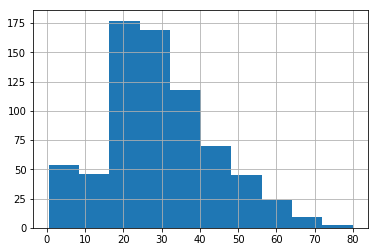

In [20]:
titanic['Age'].hist()

In [22]:
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [24]:
titanic.dropna(inplace = True)

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


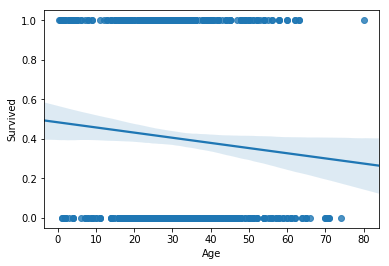

In [19]:
sns.regplot('Age', 'Survived', data = titanic)

/Users/richardmason/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


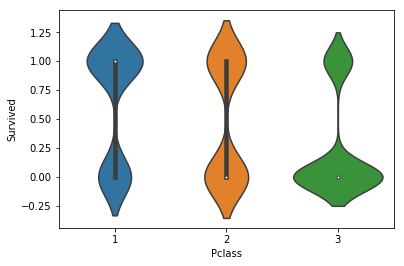

In [8]:
sns.violinplot('Pclass', 'Survived', data= titanic)

Categorical variables in their raw form can't be fed into a mathematical equation, like linear regression for instance.  Most of the time, we will use the **Dummy Variable** approach to dealing with categorical variables

Taking the titanic dataset as an example, we can create two new columns, one called "Sex_M" and one "Sex_F" like so:

In [26]:
titanic['Sex_M'] = titanic['Sex'].map({'female':0, 'male':1})
titanic['Sex_F'] = titanic['Sex'].map({'female':1, 'male':0})

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_M,Sex_F
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


Now, when we do this, we run the risk of introducing multicollinearity into our model, because in creating the two new columns, we can see that one is perfectly dependent on the value of the other(if Sex_M =1, then Sex_F = 0). To avoid this "Dummy variable trap" we can drop one of these columns or drop the bias(intercept) term.  

In [28]:
# pandas has a convenient function for us which will turn categorical columns into dummys for us, pd.get_dummies()
titanic_dummy = pd.get_dummies(titanic)

In [31]:
titanic_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 1583 entries, PassengerId to Embarked_S
dtypes: float64(2), int64(7), uint8(1574)
memory usage: 1.4 MB


In [32]:
titanic_dummy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_M,Sex_F,"Name_Abbing, Mr. Anthony",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
Sex_M          889 non-null int64
Sex_F          889 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 97.2+ KB


In [44]:
titanic.drop(columns = ['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [46]:
#titanic.drop(columns = ['Sex_M', 'Sex_F'], axis = 1, inplace = True)

In [48]:
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)

As you can see, often a categorical column will have so many values that it makes keeping track of all the variables in your data extremely difficult and tedious.  And it's extremely likely that these values won't add any power to the model, as is the case with the "Cabin" and "Name" columns above.  You should deal with these issues before using pd.get_dummies()

In [49]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [50]:
titanic_dummy = pd.get_dummies(titanic)

In [51]:
titanic_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


We can seek to use some logic to **combine levels** of these categorical variables, or make new features out of the levels.  

### Comparison between different types of statistical tests

#### T-test

A t-test tests the **Null hypothesis** that there is **no difference** between the levels of a two-level categorical variable(for example Labour and Tory party) and the **mean** of a quantitative variable(like age).  So in this example a t-test would test if there is a statistically significance in age between members of the Labour and Tory parties.  

#### Chi-Squared test
In order to test if two categorical variables are related, we can use the **Chi-Squared test**

$$\chi^2 = \frac{1}{d}\sum\limits_{k=1}^{N}\frac{(O_k - E_k)^2}{E_k}$$

Where $O_k$ is is the frequency **observed values** and $E_k$ is the frequency of the **expected values** and d is the **degress of freedom**- or the number of values that were used to calculate the statistic - 1

#### F-test

We can use the F-test to test the performance of regression models relative to each other.  Using this test will tell us if one model is significantly better than the other

The F-test formula: $$F = \frac{\frac{RSS_1 - RSS_2}{p_2 - p_1}}{\frac{RSS_2}{n-p_2}}$$

where $n$ is the number of data points, and $p_2$ and $p_1$ are the number of features in model 2 and model 1, respectively

If the F value is above a certain threshold, then we can reject the null-hypothesis that the models perform approximately the same, and conclude that model 2 is better